In [1]:
import math
import random
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot as pl

%matplotlib inline

ff = 'RC601'

In [2]:
a0 = -35
b0 = 20
a1 = 190 #+ kanan
b1 = 211 #+ turun
a2 = 210 #+ kanan
b2 = 232 #+ turun
a3 = 230 #+ kanan
b3 = 252 #+ turun

In [3]:
def position(t, theta, F, G, H):
    x = F*t*np.cos(theta) + G*t + a0
    y = H*t*np.sin(theta) + b0
    return x, y

def position1(t, theta, F, G, H):
    x = F*t*np.cos(theta) + G*t
    y = H*t*np.sin(theta)
    x1 = x*np.cos(np.pi/2.)-y*np.sin(np.pi/2.) + a1
    y1 = x*np.sin(np.pi/2.)+y*np.cos(np.pi/2.) - b1
    return x1, y1

def position2(t, theta, F, G, H):
    x = F*t*np.cos(theta) + G*t
    y = H*t*np.sin(theta)
    x1 = x*np.cos(np.pi/2.)-y*np.sin(np.pi/2.) + a2
    y1 = x*np.sin(np.pi/2.)+y*np.cos(np.pi/2.) - b2
    return x1, y1

def position3(t, theta, F, G, H):
    x = F*t*np.cos(theta) + G*t
    y = H*t*np.sin(theta)
    x1 = x*np.cos(np.pi/2.)-y*np.sin(np.pi/2.) + a3
    y1 = x*np.sin(np.pi/2.)+y*np.cos(np.pi/2.) - b3
    return x1, y1

def reaching_time(x, y, F, G, H):
    """Calcuate reaching time (t), using analytic solution for constant wind"""
    return (F * np.sqrt(y**2 * (F*F - G*G) + H*H*x*x) - G*H*x)/(H*(F*F - G*G))

def plot(t0, f0, g0, h0, s1, s2):
    Nsample=1000
    __theta = np.linspace(0.0, 2*np.pi, Nsample)
    X1 = np.zeros(Nsample)
    Y1 = np.zeros(Nsample)
    
    if s1 == 1:
        for i,theta in enumerate(__theta):
            X1[i],Y1[i] = position(t0, theta, f0, g0, h0)
    elif s1 == 2:
        for i,theta in enumerate(__theta):
            X1[i],Y1[i] = position1(t0, theta, f0, g0, h0)
    elif s1 == 3:
        for i,theta in enumerate(__theta):
            X1[i],Y1[i] = position2(t0, theta, f0, g0, h0)
    elif s1 == 4:
        for i,theta in enumerate(__theta):
            X1[i],Y1[i] = position3(t0, theta, f0, g0, h0)
    
    if s2 == 1 and s1 == 1:
        plt.plot(X1, Y1, '-', linewidth=0.5, color='blue', label='sce. a')
    elif s2 == 2 and s1 == 1:
        plt.plot(X1, Y1, '-', linewidth=0.5, color='red', label='sce. b')
    elif s2 == 3 and s1 == 1:
        plt.plot(X1, Y1, '-', linewidth=0.5, color='green', label='sce. c')
    elif s2 == 4 and s1 == 1:
        plt.plot(X1, Y1, '-', linewidth=0.5, color='black')
    elif s2 == 1:
        plt.plot(X1, Y1, '-', linewidth=0.5, color='blue')
    elif s2 == 2:
        plt.plot(X1, Y1, '-', linewidth=0.5, color='red')
    elif s2 == 3:
        plt.plot(X1, Y1, '-', linewidth=0.5, color='green')

def plot2(t0, f0, g0, h0, s1, s2):
    Nsample=1000
    __theta = np.linspace(0.0, 2*np.pi, Nsample)
    X1 = np.zeros(Nsample)
    Y1 = np.zeros(Nsample)
    
    if s1 == 1:
        for i,theta in enumerate(__theta):
            X1[i],Y1[i] = position(t0, theta, f0, g0, h0)
    elif s1 == 2:
        for i,theta in enumerate(__theta):
            X1[i],Y1[i] = position1(t0, theta, f0, g0, h0)
    elif s1 == 3:
        for i,theta in enumerate(__theta):
            X1[i],Y1[i] = position2(t0, theta, f0, g0, h0)
    elif s1 == 4:
        for i,theta in enumerate(__theta):
            X1[i],Y1[i] = position3(t0, theta, f0, g0, h0)
    
    if s2 == 1 and s1 == 1:
        plt.plot(X1, Y1, '-', dashes=(5,6), linewidth=0.8, color='blue', label='sce. a')
    elif s2 == 2 and s1 == 1:
        plt.plot(X1, Y1, '-', dashes=(5,6), linewidth=0.8, color='red', label='sce. b')
    elif s2 == 3 and s1 == 1:
        plt.plot(X1, Y1, '-', dashes=(5,6), linewidth=0.8, color='green', label='sce. c')
    elif s2 == 4 and s1 == 1:
        plt.plot(X1, Y1, '-', dashes=(5,6), linewidth=0.8, color='black')
    elif s2 == 1:
        plt.plot(X1, Y1, '-', dashes=(5,6), linewidth=0.8, color='blue')
    elif s2 == 2:
        plt.plot(X1, Y1, '-', dashes=(5,6), linewidth=0.8, color='red')
    elif s2 == 3:
        plt.plot(X1, Y1, '-', dashes=(5,6), linewidth=0.8, color='green')

In [4]:
## read data
pos = np.genfromtxt(".../%s.txt" % ff)
n = 600
number = pos[:n,0]
x = pos[:n,1]
y = pos[:n,2]
dim = len(x)

f0 = 30; g0 = 12; h0 = 16;
f1 = 30; g1 = 16; h1 = 7;

t0 = 6 # staging time
dt = 5 # t0+dt -> planning horizon
delay = 0.5
beta = np.pi/2.

# reaching time
tr0 = reaching_time(x-a0, y-b0, f0, g0, h0)
tr1 = reaching_time(y+b1, x-a1, f1, g1, h1)
tr2 = reaching_time(y+b2, x-a2, f1, g1, h1)
tr3 = reaching_time(y+b3, x-a3, f1, g1, h1)

In [5]:
# defining at risk assets and their time windows
# ----------------------------------------------
# stage 1 (before the wind change)
o0=[]; c0=[]; n0=0; x0=[]; y0=[]; fe0=[];
for i in range(dim):
    if (tr0[i]<=t0 and y[i]<=0.8*x[i]+25 and tr0[i]>2.5):
        fe0.append(1)
        x0.append(x[i])
        y0.append(y[i])
        o0.append(round(tr0[i]-2.5,2))
        c0.append(round(tr0[i]-1.5,2))
        n0 = n0 + 1
    else:
        fe0.append(0)
        x0.append(-1)
        y0.append(-1)
        o0.append(0)
        c0.append(20)
print(n0)
# ----------------------------------------------
# scenario a
o1=[]; c1=[]; n1=0; x1=[]; y1=[]; fe1=[];
for i in range(dim):
    if (tr0[i]>t0 and tr1[i]<=t0+dt and y[i]>=-2.5*x[i]+535 and y[i]>=2.5*x[i]-413):
        fe1.append(1)
        x1.append(x[i])
        y1.append(y[i])
        o1.append(round(tr1[i]-2.5,2))
        c1.append(round(tr1[i]-1.5,2))
        n1 = n1 + 1
    else:
        fe1.append(0)
        x1.append(-1)
        y1.append(-1)
        o1.append(0)
        c1.append(20)
print(n1)
# ----------------------------------------------
# scenario b
o2=[]; c2=[]; n2=0; x2=[]; y2=[]; fe2=[];
for i in range(dim):
    if (tr0[i]>t0 and tr0[i]<=t0+delay and y[i]<=0.8*x[i]+25):
        fe2.append(1)
        x2.append(x[i])
        y2.append(y[i])
        o2.append(round(tr0[i]-2.5,2))
        c2.append(round(tr0[i]-1.5,2))
        n2 = n2 + 1
    elif (tr0[i]>t0+delay and tr2[i]<=t0+dt and y[i]>=-2.5*x[i]+590 and y[i]>=2.5*x[i]-458):
        fe2.append(1)
        x2.append(x[i])
        y2.append(y[i])
        o2.append(round(tr2[i]-2.5,2))
        c2.append(round(tr2[i]-1.5,2))
        n2 = n2 + 1
    else:
        fe2.append(0)
        x2.append(-1)
        y2.append(-1)
        o2.append(0)
        c2.append(20)
print(n2)
# ----------------------------------------------
# scenario c
o3=[]; c3=[]; n3=0; x3=[]; y3=[]; fe3=[];
for i in range(dim):
    if (tr0[i]>t0 and tr0[i]<=t0+2*delay and y[i]<=0.8*x[i]+25):
        fe3.append(1)
        x3.append(x[i])
        y3.append(y[i])
        o3.append(round(tr0[i]-2.5,2))
        c3.append(round(tr0[i]-1.5,2))
        n3 = n3 + 1
    elif (tr0[i]>t0+2*delay and tr3[i]<=t0+dt and y[i]>=-2.5*x[i]+647 and y[i]>=2.5*x[i]-507):
        fe3.append(1)
        x3.append(x[i])
        y3.append(y[i])
        o3.append(round(tr3[i]-2.5,2))
        c3.append(round(tr3[i]-1.5,2))
        n3 = n3 + 1
    else:
        fe3.append(0)
        x3.append(-1)
        y3.append(-1)
        o3.append(0)
        c3.append(20)
print(n3)
# ----------------------------------------------
# impossible to visit them
x4=[]; y4=[];
for i in range(dim):
    if (tr0[i]<=t0 and y[i]<=0.8*x[i]+25 and tr0[i]<2.5):
        x4.append(x[i])
        y4.append(y[i])
# ----------------------------------------------
# assets at risk after staging time that are potentially serviced in stage 1
x5=[]; y5=[]; n5=0; fe5=[];
for i in range(dim):
    if (c1[i]>=7 and c1[i]<20 or c2[i]>=7 and c2[i]<20 or c3[i]>=7 and c3[i]<20):
        fe5.append(0)
        x5.append(-1)
        y5.append(-1)
    elif (c1[i]<7 or c2[i]<7 or c3[i]<7):
        fe5.append(1)
        x5.append(x[i])
        y5.append(y[i])
        n5 = n5 + 1
        mini = 1000
        if (o1[i]>0):
            mini = min(o1[i],mini)
        if (o2[i]>0):
            mini = min(o2[i],mini)
        if (o3[i]>0):
            mini = min(o3[i],mini)
        o0[i] = mini
        maks = 0
        if (c1[i]<20):
            maks = max(c1[i],maks)
        if (c2[i]<20):
            maks = max(c2[i],maks)
        if (c3[i]<20):
            maks = max(c3[i],maks)
        c0[i] = maks
    else:
        fe5.append(0)
        x5.append(-1)
        y5.append(-1)
print(n5)

112
83
101
128
82


Text(0,0.5,'y')

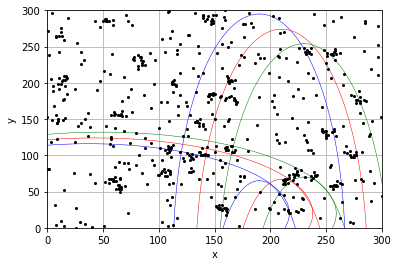

In [6]:
fig1 = plt.figure()

plot(t0, f0, g0, h0, 1, 1)
plot(t0+delay, f0, g0, h0, 1, 2)
plot(t0+2*delay, f0, g0, h0, 1, 3)

plot(t0, f1, g1, h1, 2, 1)
plot(t0+dt, f1, g1, h1, 2, 1)

plot(t0+delay, f1, g1, h1, 3, 2)
plot(t0+dt, f1, g1, h1, 3, 2)

plot(t0+2*delay, f1, g1, h1, 4, 3)
plot(t0+dt, f1, g1, h1, 4, 3)

plt.plot(x, y, 'ko', markersize=2)
plt.grid(True)
plt.xlim([0,300])
plt.ylim([0,300])
plt.xlabel('x')
plt.ylabel('y')

In [9]:
pro = []
for i in range(dim):
    pro.append(np.random.randint(1,5)*10)

req1 = []; req2 = []; req3 = [];
for i in range(dim):
    rn = np.random.randint(1,7)
    if rn == 1:
        req1.append(2); req2.append(0); req3.append(0);
    elif rn == 2:
        req1.append(0); req2.append(2); req3.append(0);
    elif rn == 3:
        req1.append(0); req2.append(0); req3.append(2);
    elif rn == 4:
        req1.append(1); req2.append(1); req3.append(0);
    elif rn == 5:
        req1.append(0); req2.append(1); req3.append(1);
    elif rn == 6:
        req1.append(1); req2.append(0); req3.append(1);
    elif rn == 7:
        req1.append(1); req2.append(1); req3.append(1);

n=0;
for i in range(dim):
    if (fe0[i]==1 or fe1[i]==1 or fe2[i]==1 or fe3[i]==1):
        n = n+1
out = open(".../tw.txt", "w")
out.write("%d\n" % (n+1))
out.write("0 %d %d 0 0 0 20 0 20 0 20 0 20 0 0 0\n" % (x[0], y[0]))
j = 1
xx=[]; yy=[];
for i in range(dim):
    if (i>0 and fe0[i]==1 or fe1[i]==1 or fe2[i]==1 or fe3[i]==1):
        out.write("%d %d %d %d 1 " % (j, x[i], y[i], pro[i]))
        out.write("%s %s %s %s %s %s %s %s " % (o0[i], c0[i], o1[i], c1[i], o2[i], c2[i], o3[i], c3[i]))
        out.write("%d %d %d \n" % (req1[i], req2[i], req3[i]))
        j = j+1
        xx.append(x[i])
        yy.append(y[i])
print(n+1)
print(n0)
print(n1)
print(n2)
print(n3)

302
112
83
101
128


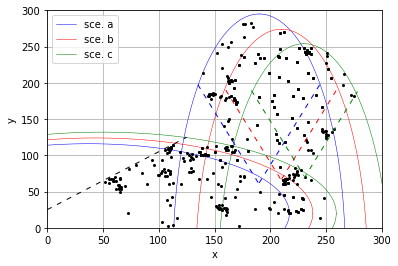

In [18]:
fig2 = plt.figure()

#plot(2.5, f0, g0, h0, 1, 4)
plot(t0, f0, g0, h0, 1, 1)
plot(t0+delay, f0, g0, h0, 1, 2)
plot(t0+2*delay, f0, g0, h0, 1, 3)

#plot(t0, f1, g1, h1, 2, 1)
# plot(t0+0.5, f1, g1, h1, 2, 1)
plot(t0+dt, f1, g1, h1, 2, 1)

#plot(t0+delay, f1, g1, h1, 3, 2)
plot(t0+dt, f1, g1, h1, 3, 2)

#plot(t0+2*delay, f1, g1, h1, 4, 3)
plot(t0+dt, f1, g1, h1, 4, 3)

plt.plot(x0, y0, 'ko', markersize=2)
plt.plot(x1, y1, 'ko', markersize=2)
plt.plot(x2, y2, 'ko', markersize=2)
plt.plot(x3, y3, 'ko', markersize=2)

xx1 = np.linspace(0,125,20)
yy1 = 0.8*xx1+25
plt.plot(xx1, yy1, '-', dashes=(5,6), linewidth=1, color='black')

xx2 = np.linspace(135,190,20)
yy2 = -2.5*xx2+535
plt.plot(xx2, yy2, '-', dashes=(5,6), linewidth=1, color='blue')

xx2 = np.linspace(190,245,20)
yy2 = 2.5*xx2-413
plt.plot(xx2, yy2, '-', dashes=(5,6), linewidth=1, color='blue')

xx3 = np.linspace(160,210,20)
yy3 = -2.5*xx3+590
plt.plot(xx3, yy3, '-', dashes=(5,6), linewidth=1, color='red')

xx3 = np.linspace(210,260,20)
yy3 = 2.5*xx3-458
plt.plot(xx3, yy3, '-', dashes=(5,6), linewidth=1, color='red')

xx4 = np.linspace(183,230,20)
yy4 = -2.5*xx4+647 #+ naik - turun
plt.plot(xx4, yy4, '-', dashes=(5,6), linewidth=1, color='green')

xx4 = np.linspace(230,278,20)
yy4 = 2.5*xx4-507  #+ turun - naik
plt.plot(xx4, yy4, '-', dashes=(5,6), linewidth=1, color='green')

plt.grid(True)
plt.xlim([0,300])
plt.ylim([0,300])
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

fig2.savefig('.../vis%s.png' % ff)

In [19]:
# Plot routes

In [11]:
def drawArrow(A,B,z):
    if z==1:
        arr=plt.arrow(A[0],A[1],B[0]-A[0],B[1]-A[1],
              head_width=3,length_includes_head=True,fc='tab:red',ec='tab:red')
    elif z==2:
        arr=plt.arrow(A[0],A[1],B[0]-A[0],B[1]-A[1],
              head_width=3,length_includes_head=True,fc='tab:blue',ec='tab:blue')
    return arr

In [14]:
import re
res=[]
with open(".../sol.txt") as f:
    for line in f:
        s = re.findall(r'\d+',line)
        res.append(s)
dimr=len(res)

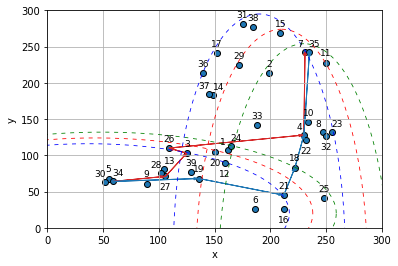

In [16]:
pos = np.genfromtxt(".../coord.txt")
n = 40
number = pos[:n,0]
xq = pos[:n,1]
yq = pos[:n,2]
dim = len(xq)

fig3 = plt.figure()
plot2(t0, f0, g0, h0, 1, 1)
plot2(t0+delay, f0, g0, h0, 1, 2)
plot2(t0+2*delay, f0, g0, h0, 1, 3)
plot2(t0+dt, f1, g1, h1, 2, 1)
plot2(t0+dt, f1, g1, h1, 3, 2)
plot2(t0+dt, f1, g1, h1, 4, 3)
plt.scatter(xq, yq, edgecolors='black')
plt.grid(True)
plt.xlim([0,300])
plt.ylim([0,300])
plt.xlabel('x')
plt.ylabel('y')
# plt.legend()

for i in range(dimr):
    if int(res[i][2])==1:
        arr1=drawArrow([xq[int(res[i][0])-1],yq[int(res[i][0])-1]],[xq[int(res[i][1])-1],yq[int(res[i][1])-1]],1)
    elif int(res[i][2])==2:
        arr2=drawArrow([xq[int(res[i][0])-1],yq[int(res[i][0])-1]],[xq[int(res[i][1])-1],yq[int(res[i][1])-1]],2)

for i in range(len(xq)):
    if (i+1==16 or i+1==12 or i+1==27 or i+1==22 or i+1==32 or i+1==20): #bawah
        plt.annotate(i+1,(xq[i],yq[i]),textcoords="offset points",xytext=(0,-13),ha='center',fontsize=9)
    elif (i+1==30 or i+1==37 or i+1==7 or i+1==1 or i+1==28 or i+1==4 or i+1==8): #kiri
        plt.annotate(i+1,(xq[i],yq[i]),textcoords="offset points",xytext=(-5,6),ha='center',fontsize=9)
    elif (i+1==34 or i+1==14 or i+1==35 or i+1==24 or i+1==13 or i+1==23): #kanan
        plt.annotate(i+1,(xq[i],yq[i]),textcoords="offset points",xytext=(5,6),ha='center',fontsize=9)
    else:
        plt.annotate(i+1,(xq[i],yq[i]),textcoords="offset points",xytext=(0,7),ha='center',fontsize=9)

plt.legend([arr1,arr2],['vehicle 1','vehicle 2'])
plt.xlabel('x')
plt.ylabel('y')

fig3.savefig('.../RC.png')